In [1]:
import pandas as pd
import numpy as np 
from backtest.tools import get_daily_data, factor_backtest

ModuleNotFoundError: No module named 'backtest'

## Step 1: 获取日频数据字段

In [21]:
df = get_daily_data('2021-01-01', '2024-12-31')
df

,date,stock_code,name,open,close,high,low,volume,amount,days_to_pretrading,...,total_mcap,float_mcap,float_a_share,float_b_share,float_a_mcap,float_b_mcap,latest_dividend_change_date,exchange,list_date,days_listed
0,2021-01-04,000001,平安银行,2871.5180,2796.3470,2871.5180,2772.2930,155421643,2891682312.0000,2.0000,...,360950078482.8000,360947033235.0000,19405754475.0000,NaN,360947033235.0000,NaN,2020-12-31,SZ,1991-04-03,10869.0000
1,2021-01-04,000002,万科A,3431.2760,3356.3680,3431.2760,3324.9550,146844133,4079416859.0000,2.0000,...,322740600543.7800,322556050558.7400,9717553265.0000,NaN,269953629701.7000,NaN,2020-12-31,SZ,1991-01-29,10933.0000
2,2021-01-04,000006,深振业A,375.7640,367.7690,375.7640,366.4370,8132668,45029731.0000,2.0000,...,7451972653.9200,7451972653.9200,1349995046.0000,NaN,7451972653.9200,NaN,2020-12-31,SZ,1992-04-27,10479.0000
3,2021-01-04,000007,全新好,75.5530,75.5530,75.5530,75.5530,850900,5335143.0000,2.0000,...,2172229235.8800,1937104235.8800,308948044.0000,NaN,1937104235.8800,NaN,2017-05-22,SZ,1992-04-13,10493.0000
4,2021-01-04,000008,神州高铁,68.3090,67.7710,68.5780,67.5020,13795696,34796287.0000,2.0000,...,7007604271.9200,6716346053.7600,2665216688.0000,NaN,6716346053.7600,NaN,2020-12-31,SZ,1992-05-07,10469.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944232,2024-12-31,873679,前进科技,18.1850,18.1400,18.8710,17.9410,784008,13021953.8100,1.0000,...,915381500.0000,428278895.0000,NaN,NaN,NaN,NaN,2024-11-19,BJ,2023-11-10,417.0000
3944233,2024-12-31,873693,阿为特,35.6520,35.5120,36.9540,35.3610,905116,32739551.1300,1.0000,...,2577942000.0000,1298190600.0000,NaN,NaN,NaN,NaN,2024-11-01,BJ,2023-10-27,431.0000
3944234,2024-12-31,873703,广厦环能,30.0550,29.7820,30.7440,29.7390,747979,15730034.7000,1.0000,...,2232868400.0000,683902433.3000,NaN,NaN,NaN,NaN,2024-07-04,BJ,2023-12-05,392.0000
3944235,2024-12-31,873726,卓兆点胶,22.1080,21.6700,23.1510,21.5660,906051,19488034.1900,1.0000,...,1705565171.8800,413634544.4800,NaN,NaN,NaN,NaN,2024-06-27,BJ,2023-10-19,439.0000


In [3]:
def get_DW_UBL(df):
    # 计算威廉下影线mean因子
    df['downshadow'] = np.where(df['open'] < df['close'], df['open'] - df['low'], df['close'] - df['low'])
    df['downmean'] = df.groupby('stock_code')['downshadow'].transform(lambda x: x.rolling(5, min_periods=1).mean())
    df['downshadow_adj'] = df['downshadow'] / df['downmean']
    # df['downshadow_mean'] = df.groupby('stock_code')['downshadow_adj'].transform(lambda x: x.rolling(20, min_periods=1).mean())
    df['downshadow_mean_normalized'] = df.groupby('date')['downshadow_adj'].transform(lambda x: (x - x.mean()) / x.std())

    # UBL因子
    df['DW_UBL'] = df['downshadow_mean_normalized']
    return df[['stock_code','date','DW_UBL']]
factor_df = get_DW_UBL(df)
factor_df

,stock_code,date,DW_UBL
0,000001,2021-01-04,NaN
1,000002,2021-01-04,NaN
2,000006,2021-01-04,NaN
3,000007,2021-01-04,NaN
4,000008,2021-01-04,NaN
...,...,...,...
3944232,873679,2024-12-31,0.093166
3944233,873693,2024-12-31,0.824971
3944234,873703,2024-12-31,-0.086642
3944235,873726,2024-12-31,0.684717


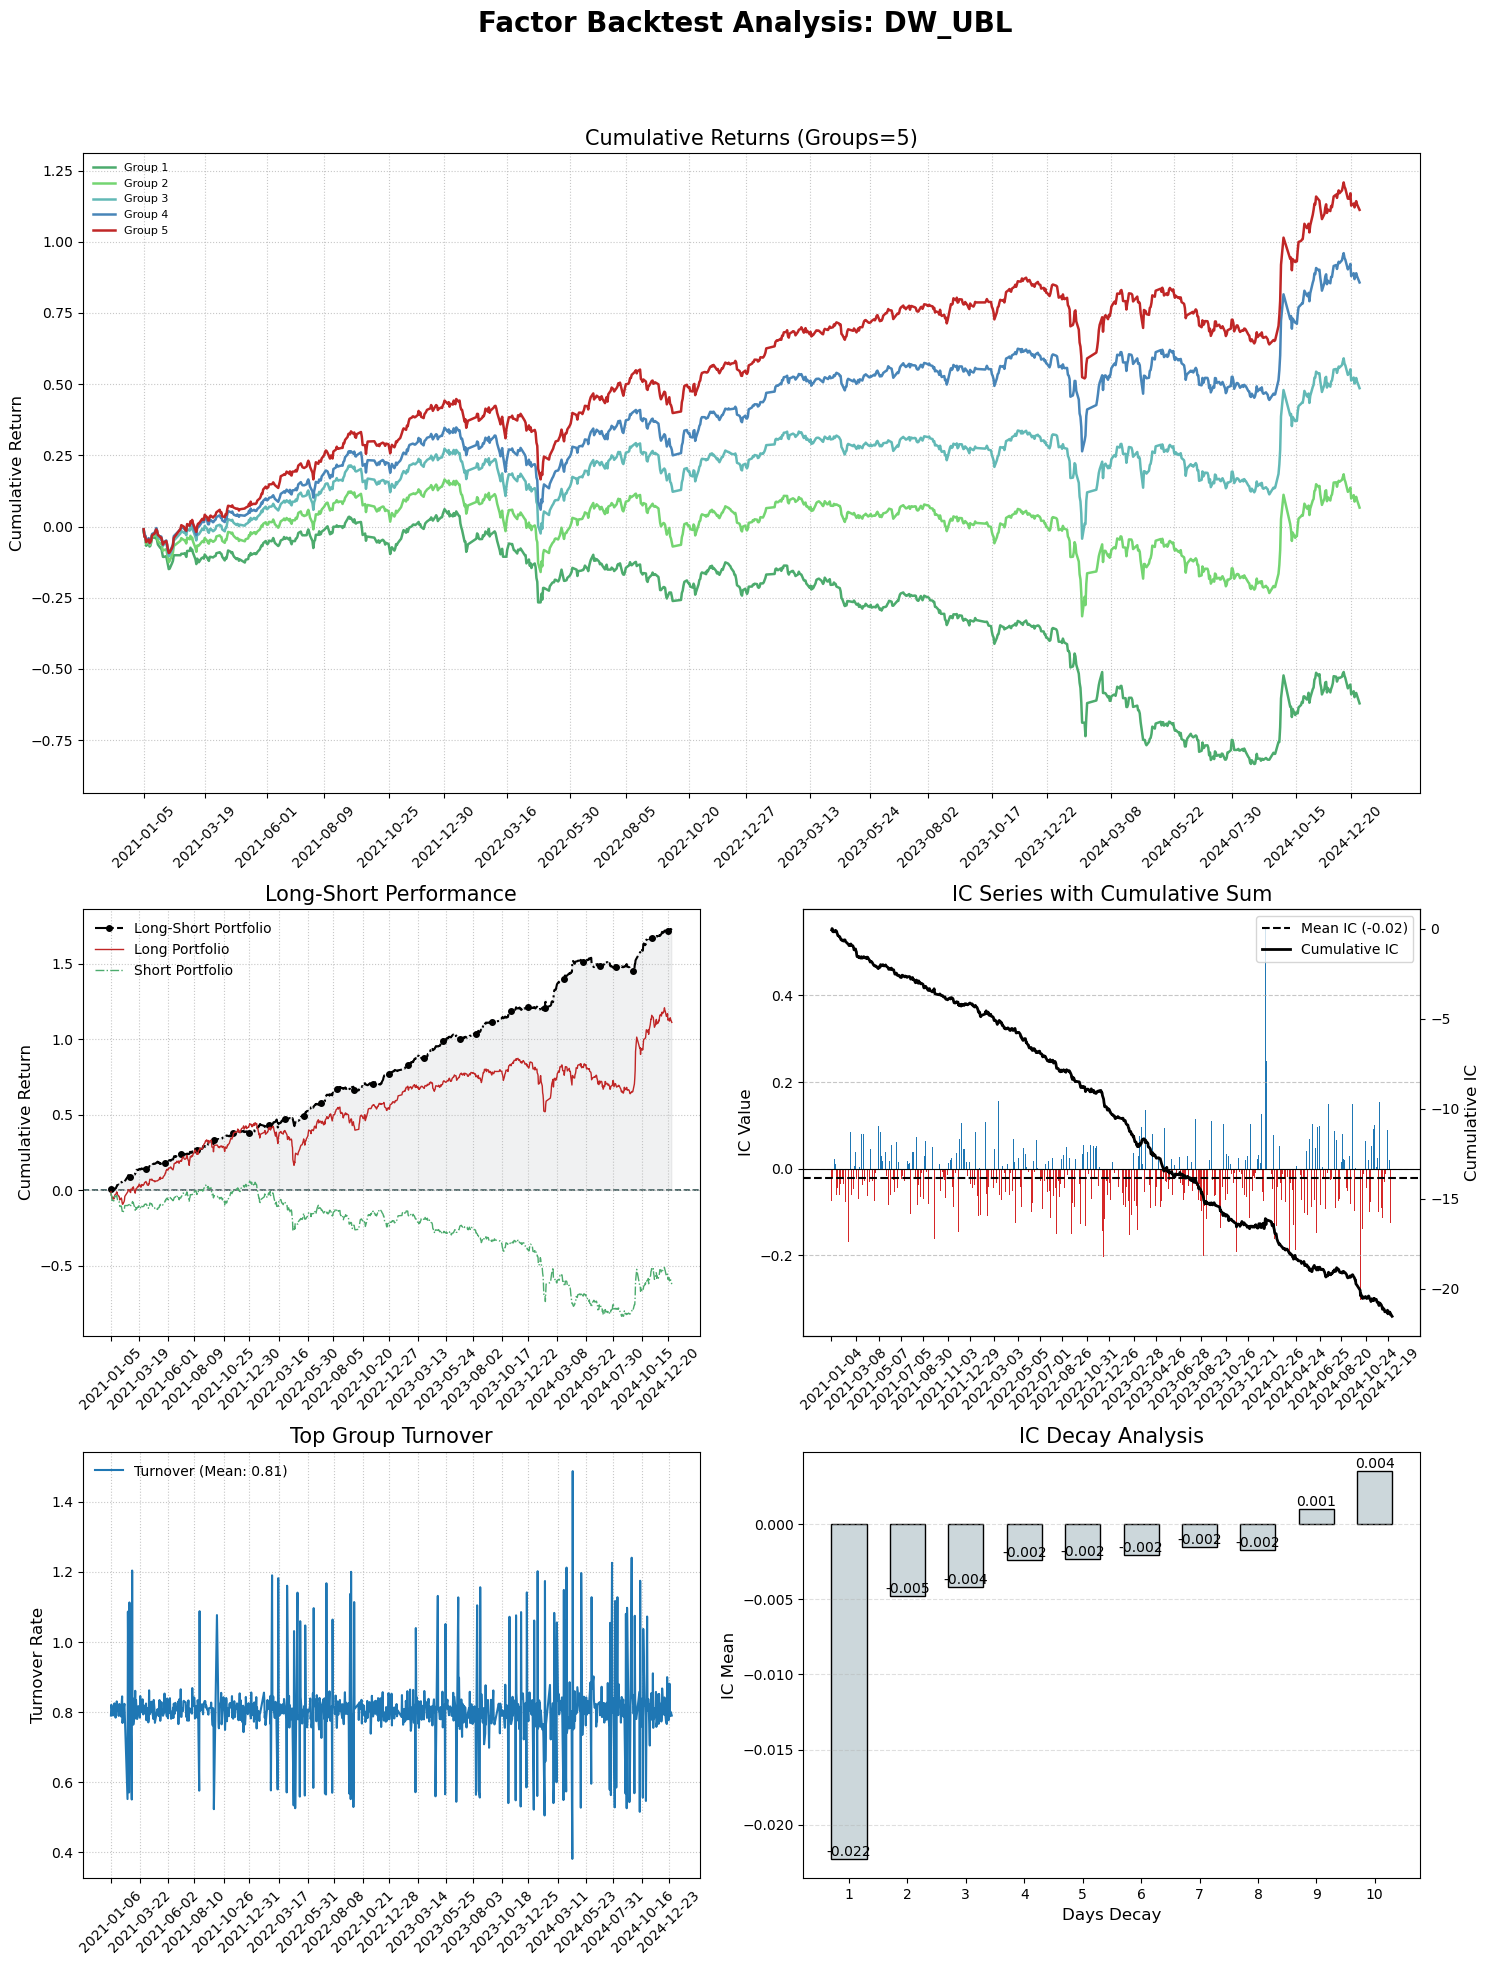

,IC,ICIR,Long AR,Long MDD,Long Sharpe,Short AR,Short MDD,Short Sharpe,LS AR,LS MDD,LS Sharpe,Days
value,-0.022,0.31,0.29,0.305,0.783,-0.162,0.616,-1.149,0.452,0.088,3.066,968


In [4]:
# Step2: 分组收益图绘制，注意组号5为多头组，组号1为空头组
result, group_returns, ic = factor_backtest(factor_df,
                                            factor_name = 'DW_UBL',
                                            start_date='2021-01-01',
                                             end_date='2025-01-01', 
                                            lag_days = 1, 
                                            direction = -1,
                                            group = 5,
                                          )
result

In [19]:
df_transposed = result.T.reset_index()

# Format numbers to 4 decimal places
pd.set_option('display.float_format', '{:.4f}'.format)

# Print transposed DataFrame with borders, excluding index
print(tabulate(df_transposed, tablefmt='grid', showindex=False))

+--------------+---------+
| IC           |  -0.022 |
+--------------+---------+
| ICIR         |   0.31  |
+--------------+---------+
| Long AR      |   0.29  |
+--------------+---------+
| Long MDD     |   0.305 |
+--------------+---------+
| Long Sharpe  |   0.783 |
+--------------+---------+
| Short AR     |  -0.162 |
+--------------+---------+
| Short MDD    |   0.616 |
+--------------+---------+
| Short Sharpe |  -1.149 |
+--------------+---------+
| LS AR        |   0.452 |
+--------------+---------+
| LS MDD       |   0.088 |
+--------------+---------+
| LS Sharpe    |   3.066 |
+--------------+---------+
| Days         | 968     |
+--------------+---------+
